# Приложение Procrastinate Pro+

## Цель и ход исследоваия.

**Цель исследования:** 
1. Выявить причины убыточности приложения Procrastinate Pro+. в последние шесть месяцев.
2. Найти способы устранения причин убыточности компании.

  **Ход исследования**
  
  Данные о приложении мы получим из файлов visits_info_short.csv, orders_info_short.csv и costs_info_short.csv .Известно, что данные содержат сведения о пользователях, привлечённых с 1 мая по 27 октября 2019 года. О качестве данных ничего не известно. Поэтому перед тем, как приступить к целям исследования, понадобится обзор данных.
  
  Мы проверим данные на наличие пропусков и дубликатов, приведём столбцы к необходимым типам данных и приступим к проведению анализа.
  
  Таким образом, наше исследование будет состоять из шести этапов:
  - Обзор данных.
  - Предобработка данных.
  - Исследовательский анализ данных.
  - Анализ маркетинга.
  - Оценка окупаемости рекламы.
  - Формулирование общих выводов и рекомендаций.

## Загрузка данных и подготовка к анализу

### Импорт библиотек.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

### Загрузка данных.

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  
    pd.read_csv('/datasets/orders_info_short.csv'), 
    pd.read_csv('/datasets/costs_info_short.csv'), 
)

### Изучение и предобработка данных таблицы visits.

**Напишем функцию для вывода информации по таблице, а также подсчёту пропусков и дубликатов.**

In [3]:
def info(df):
    print(('\033[1m' + 'Общая информация о таблице ' + '\033[0m'))
    display(df.info())
    
    print(('\033[1m' + 'Количество пропусков в таблице :' + '\033[0m'))
    display(df.isna().sum())
    
    print('\033[1m' + 'Количество дубликатов в таблице :{}'.format(df.duplicated().sum())  + '\033[0m')

**Смотрим информацию по таблице visits.**

In [4]:
info(visits)

Общая информация о таблице 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Количество пропусков в таблице :


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Количество дубликатов в таблице :0


In [5]:
#Переименуем столбцы по правилам стиля
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

**Проверим наличие неявных дубликатов в категориальных столбцах.**

In [6]:
sorted(visits.region.unique())

['France', 'Germany', 'UK', 'United States']

In [7]:
sorted(visits.device.unique())

['Android', 'Mac', 'PC', 'iPhone']

In [8]:
sorted(visits.channel.unique())

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds',
 'organic']

In [9]:
#преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

### Изучение и предобработка данных таблицы  orders.

**Смотрим информацию по таблице orders.**

In [10]:
info(orders)

Общая информация о таблице 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Количество пропусков в таблице :


User Id     0
Event Dt    0
Revenue     0
dtype: int64

Количество дубликатов в таблице :0


In [11]:
#Переименуем столбцы по правилам стиля
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [12]:
#преобразуем данные о времени
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

### Изучение и предобработка данных таблицы costs.

**Смотрим информацию по таблице costs.**

In [13]:
info(costs)

Общая информация о таблице 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Количество пропусков в таблице :


dt         0
Channel    0
costs      0
dtype: int64

Количество дубликатов в таблице :0


In [14]:
#Переименуем столбцы по правилам стиля
costs.columns = costs.columns.str.lower().str.replace(' ', '_')
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [15]:
#преобразуем данные о времени
costs['dt'] = pd.to_datetime(costs['dt'])

**Проверим наличие неявных дубликатов в категориальных столбцах.**

In [16]:
sorted(costs.channel.unique())

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds']

### Вывод по ознакомлению и предобработке данных.
**Вывод:на этапе ознакомления и предобработки данных мы:**
 - выяснили, что в полученных датасетах нет пропусков и явных и неявных дубликатов;
 - переименовали столбцы по правилам стиля;
 - преобразовали данные о времени.

## Задаём функции для расчёта и анализа LTV, ROI, удержания и конверсии.



### Задаём функцию для создания пользовательских профилей.

In [17]:
def get_profiles(sessions, orders,  ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].values.astype('datetime64[D]')
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [18]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769

### Задаём функцию для расчёта удержания.

In [19]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Задаём функцию для расчёта конверсии.

In [20]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Задаём функцию для расчёта LTV и ROI.

In [21]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Задаём функцию для сглаживания.

In [22]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Задаём  функцию для построения графиков удержания.

In [23]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Задаём  функцию для построения графиков конверсии.

In [24]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Задаём  функцию для построения графиков LTV и ROI.

In [25]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(22, 12))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных



### Выводим профили пользователей.

In [26]:
profiles.head()

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769

### Выводим минимальную и  максимальную даты привлечения.

In [27]:
'Минимальная дата привлечения:{}'.format(profiles['dt'].min())

'Минимальная дата привлечения:2019-05-01 00:00:00'

In [28]:
'Максимальная дата привлечения:{}'.format(profiles['dt'].max())

'Максимальная дата привлечения:2019-10-27 00:00:00'

**Вывод:** 
 - минимальная дата привлечения - 1 мая 2019 года
 - максимальная дата привлечения - 27 октября 2019 года.
 - результаты соответствуют описанию данных.

### Количество пользователей и доля платящих для каждой страны.

**Пишем функцию для подсчёта количества пользователей по признаку и долю платящих по этому признаку.**

In [29]:
def group_sign(column):
    result=profiles.groupby(column).agg({'user_id':'nunique','payer':'mean'}).sort_values(by='user_id',ascending=False)
    result['payer'] = round(result['payer']*100,2)
    result = result.style.format('{:.2f}').highlight_max(color='lightgreen').highlight_min(color='pink')
    return result

In [30]:
channel_profiles = profiles.groupby('channel').agg({'user_id':'nunique','payer':'mean'}).sort_values(by='user_id',ascending=False)
channel_profiles

user_id     payer
channel                              
organic               56439  0.020553
FaceBoom              29144  0.122049
TipTop                19561  0.096007
OppleCreativeMedia     8605  0.027077
LeapBob                8553  0.030633
WahooNetBanner         8553  0.052964
RocketSuperAds         4448  0.079137
MediaTornado           4364  0.035747
YRabbit                4312  0.038265
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700

**Сгруппируем таблицу с пользователями по стране и посчитаем количество пользователей из каждой страны и долю платящих из каждой страны.**

In [31]:
group_sign('region')


**Вывод:**
 - наибольшее количество привлеченных пользователей из США - около 100 тысяч или 2/3 от всех пользователей. В этой же стране наибольшая доля платящих - почти 7%
 - меньше всего пользователей из Германии - около 15 тысяч
 - наименьшая доля платящих во Франции - около 3,8 %.

### Количество пользователей и доля платящих для каждого устройства.

**Сгруппируем таблицу с пользователями по типу устройства и посчитаем количество пользователей из каждому устройству и долю платящих по каждому устройству.**

In [32]:
group_sign('device')

**Вывод:**
 - наибольшее количество пользователей используют Айфон - почти 55 тысяч человек. 
 - меньше всего пользователей используют PC и Mac - таких пользователей примерно по 30 тысяч
 - наибольшая доля платящих у пользователей, использующих Mac - 6,36 %
 - наименьшая доля платящих у пользователей, использующих РС - 5,05 %

### Количество пользователей и доля платящих для каждого рекламного источника.

**Сгруппируем таблицу с пользователями по рекламным источникам и посчитаем количество пользователей по каждому источнику и долю платящих по каждому источнику.**

In [33]:
group_sign('channel')
 

**Вывод:**
 - наибольшее количество пользователей пришли в приложение сами - более 56 тысяч человек. Эти же пользователи реже всех покупают - только 2,06 % пользователей, пришедших не из рекламы становятся покупателями.
 - из рекламных источников лидером по привлечению является FaceBoom - 29144 человека. Этот же канал лидер по доле платящих пользователей - 12,2 %.
 - меньше всех пользователей привлёк lambdaMediaAds - 2149 человек
 - наименьшая доля платящих у пользователей, привлечённых каналом OppleCreativeMedia- 2,71 %

### Вывод по исследовательскому анализу.
 1. 2/3 пользователей приложения из США. В этой же стране наибольшая доля платящих. Наименьшая же доля покупателей у пользователей из Франции.
 2. Наибольшее количество пользователей используют Айфон. Остальные типы устройства распределены практически равномерно. Наибольшая доля платящих у пользователей, использующих Mac.
 3. Из рекламных источников по количеству привлечённых пользователей лидирует FaceBoom. Но наибольшее количество пользователей пришли в приложение самостоятельно, без помощи каналов привлечения. По доле платящих лидирует так же FaceBoom.

## Маркетинг



### Расчёт общей суммы расходов на маркетинг.

In [34]:
all_costs = round(costs['costs'].sum())
'Общая сумма расходов на маркетинг:{}'.format(all_costs)

'Общая сумма расходов на маркетинг:105497'

**Вывод:** общая сумма расходов на маркетинг составила 105497.

### Расчёт суммы расходов на маркетинг в зависимости от рекламного источника и доли затрат по источнику от общей суммы затрат

**Посчитаем, сколько денег было потрачено на каждый рекламный источник и какую долю от всех затрат составляет эта сумма.**

In [35]:
costs_by_channel= costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False).reset_index()
costs_by_channel['all_costs'] = all_costs #добавляем столбец с уже рассчитанными общими расходами
costs_by_channel['part_of_costs'] = round(costs_by_channel['costs']/costs_by_channel['all_costs']*100,2)#считаем долю для 
                                                                                                        #каждого источника
costs_by_channel

channel     costs  all_costs  part_of_costs
0              TipTop  54751.30     105497          51.90
1            FaceBoom  32445.60     105497          30.75
2      WahooNetBanner   5151.00     105497           4.88
3          AdNonSense   3911.25     105497           3.71
4  OppleCreativeMedia   2151.25     105497           2.04
5      RocketSuperAds   1833.00     105497           1.74
6             LeapBob   1797.60     105497           1.70
7      lambdaMediaAds   1557.60     105497           1.48
8        MediaTornado    954.48     105497           0.90
9             YRabbit    944.22     105497           0.90

**Для наглядности построим график с долей затрат от общей суммы затрат по каждому источнику.**

In [36]:
import plotly.express as px

In [37]:
fig = px.bar(costs_by_channel.sort_values(by='part_of_costs', ascending=True),
             
             height=500,
             width=800,
             x='part_of_costs', 
             y='channel', 
             text='part_of_costs' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве заведений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Доля трат по рекламным источникам',
                   xaxis_title='Доля от всех трат на рекламу',
                   yaxis_title='Рекламный источник')
fig.show() 

**Вывод:** более 80% всех затрат на маркетинг пришлись на 2 канала привлечения: TipTop и FaceBoom.	

### Динамика изменения расходов во времени по неделям и месяцам по каждому источнику.

**В таблицу costs добавляем новые столбцы: с неделей, месяцем и годом проведения рекламной кампании.**

In [38]:
costs['costs_week'] = costs['dt'].dt.isocalendar().week
costs['costs_month'] = costs['dt'].dt.month
costs['costs_year'] = costs['dt'].dt.year


**Строим график динамики изменения расходов во времени по неделям по каждому источнику.**

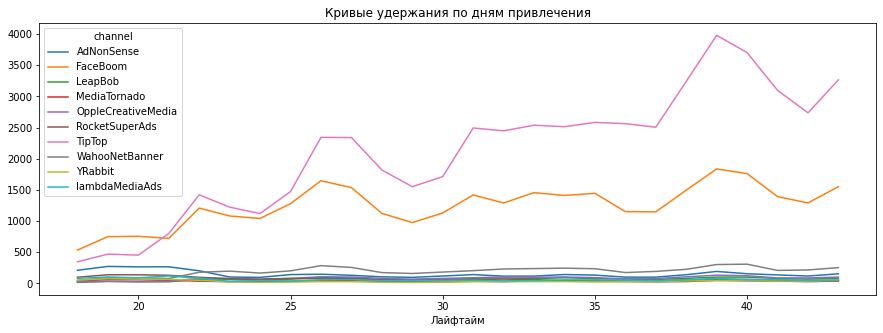

In [39]:
costs.pivot_table(index='costs_week',columns='channel',values='costs',aggfunc='sum').plot(
    
    
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()

**Строим график динамики изменения расходов во времени по месяцам по каждому источнику.**

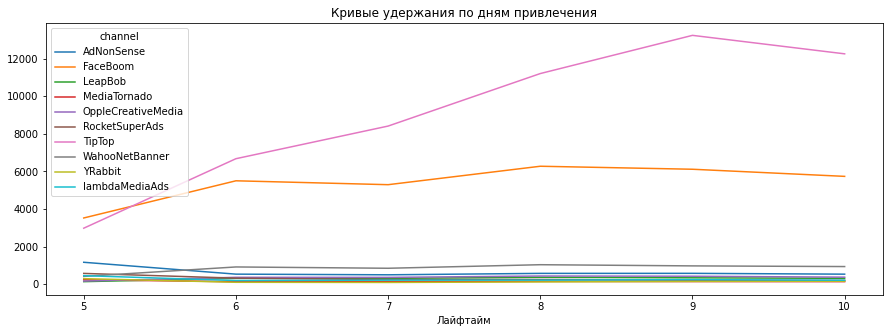

In [40]:
costs.pivot_table(index='costs_month',columns='channel',values='costs',aggfunc='sum').plot(
      
    
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()

**Вывод:** затраты на рекламу существенно растут на протяжении всего исследуемого периода у канала привлечения TipTop. С мая по октябрь затраты на него выросли почти в 4 раза. Для остальных источников затраты довольно стабильны, за исключением FaceBoom, затраты на который выросли примерно в 2 раза.

### Расчёт средней стоимости привлечения одного пользователя (CAC) из каждого источника.

**Посчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Для этого сгруппируем таблицу profiles по каналам привлечения и посчитаем среднее значение столбца acquisition_cost.**

In [41]:
round(profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost',ascending=False),2)

acquisition_cost
channel                             
TipTop                          2.80
FaceBoom                        1.11
AdNonSense                      1.01
lambdaMediaAds                  0.72
WahooNetBanner                  0.60
RocketSuperAds                  0.41
OppleCreativeMedia              0.25
YRabbit                         0.22
MediaTornado                    0.22
LeapBob                         0.21
organic                         0.00

**Вывод:**
 - дороже всего привлечение обходится через канал TipTop - почти 2,8
 - дешевле всего стоит привлечение из следующих источников:LeapBob, MediaTornado, YRabbit -  0,21-0,22.

### Вывод по маркетингу.

**Общий вывод по расходам на маркетинг:**
 1. Общая сумма расходов на маркетинг составила 105497.
 2. Более 80% всех затрат на маркетинг пришлись на 2 канала привлечения: TipTop и FaceBoom
 3. Затраты на рекламу значительно выросли у канала привлечения TipTop. Для остальных каналов расходы стабильны.
 4. Самый дорогой привлечнный пользователь у канала TipTop. Самые дешвые пользователи у каналов LeapBob, MediaTornado, YRabbit.

## Оценка окупаемости рекламы



### Подготовка данных для оценки окупаемости рекламы.

**Исключим из анализа органических пользователей. Они могут исказить результаты, так как приходят в приложение бесплатно.**

In [42]:
profiles_without_organic = profiles.query('channel!="organic"')

**Зафиксируем момент и горизонт анализа.**

In [43]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 #пользователи должны окупаться за 2 недели


### Графики LTV и ROI, графики динамики LTV, CAC и ROI без разбивки.

**Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI без разбивки, чтобы оценить общую ситуацию.**

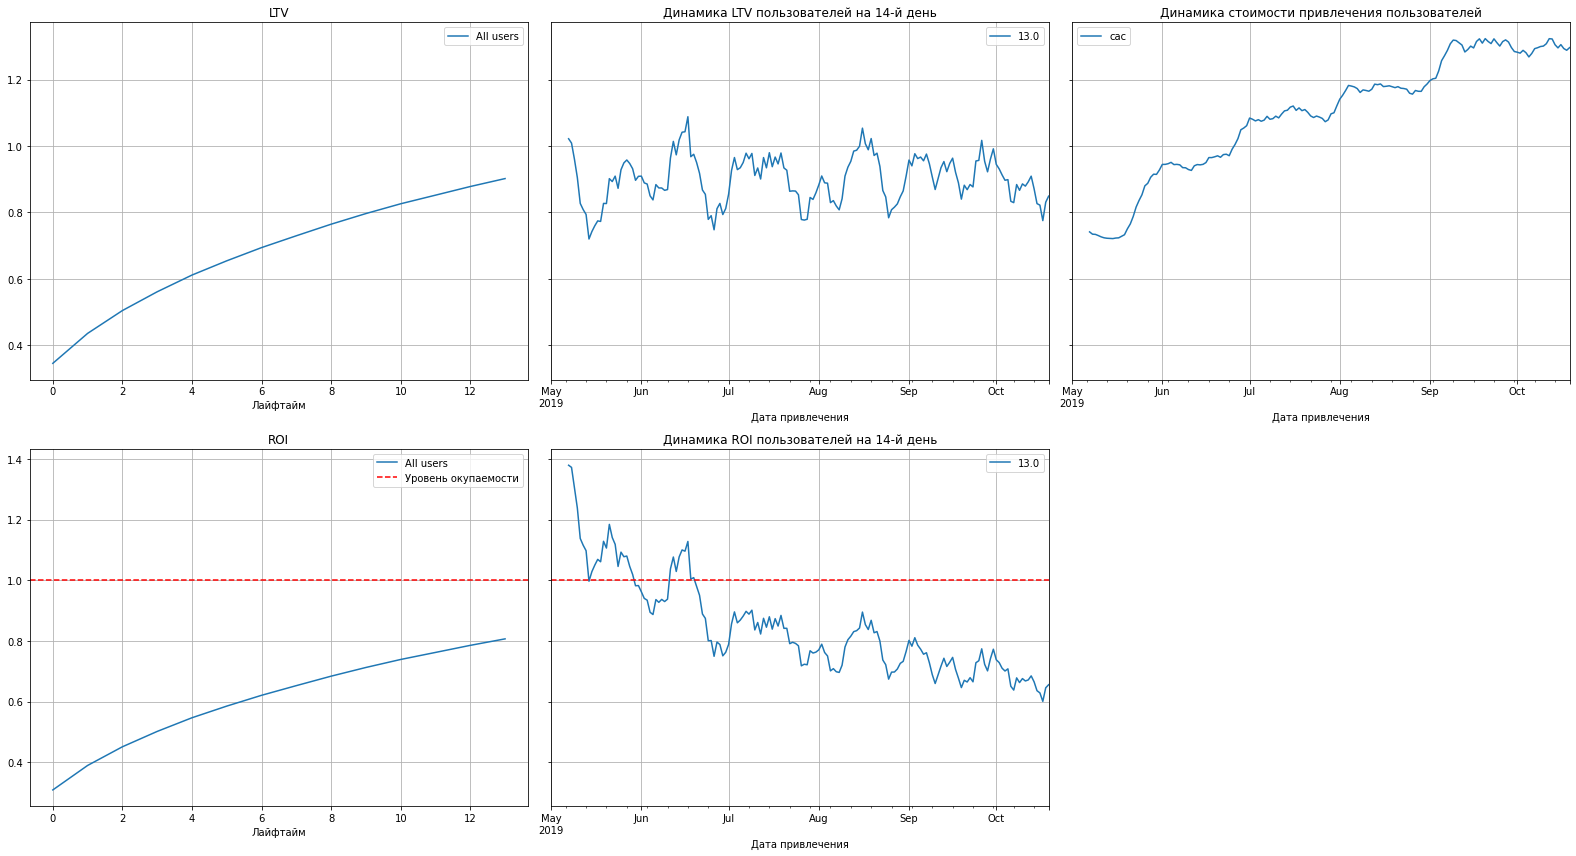

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:**
 1. В целом реклама не окупается. В среднем ROI на 14 день около 0,8. Заметно ощутимое падение, начиная с середины июня.
 2. Весь исследуемый период общий рекламный бюджет растёт. Так в мае стоимость одного привлечённого пользователя была чуть выше 0,7, а в октябре он подорожал до 1,3.
 3. LTV, то есть качество пользователей довольно стабильно. За весь исследуемый период LTV на 14 день варьируется примерно от 0,8 до 1.

### График конверсии без разбивки.

**Построим график конверсии пользователей.**

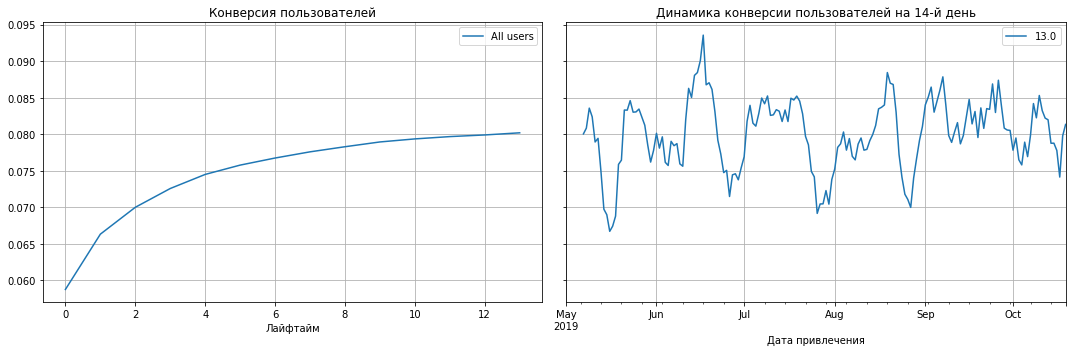

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:**
 1. Средняя конверсия на 14 день составляет около 8%.
 2. Конверсия падает к концу месяца, но в целом довольна стабильна и варьируется от примерно 6,7% до 9,4% на 14 день жизни.

### График удержания без разбивки.

**Построим график удержания пользователей.**

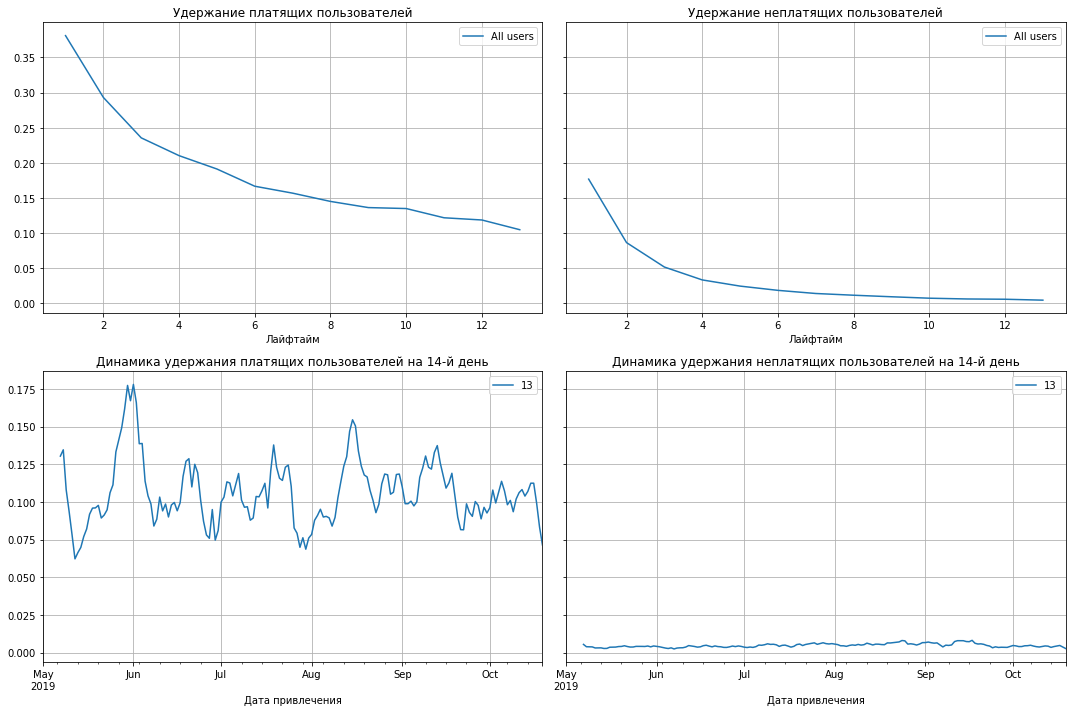

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
 1. Удержание платящих пользователей выше, чем неплатящих и составляет около 10% на 14 день жизни.
 2. Удержание платящих пользователей довольно хаотично в зависимости от даты привлечения - то растёт, то падает, но при этом в октябре находилось на том же уровне, что и в мае.
 3. Удежание неплатящих пользователей стабильно низкое.

### Графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по устройствам.

**Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по устройствам.**

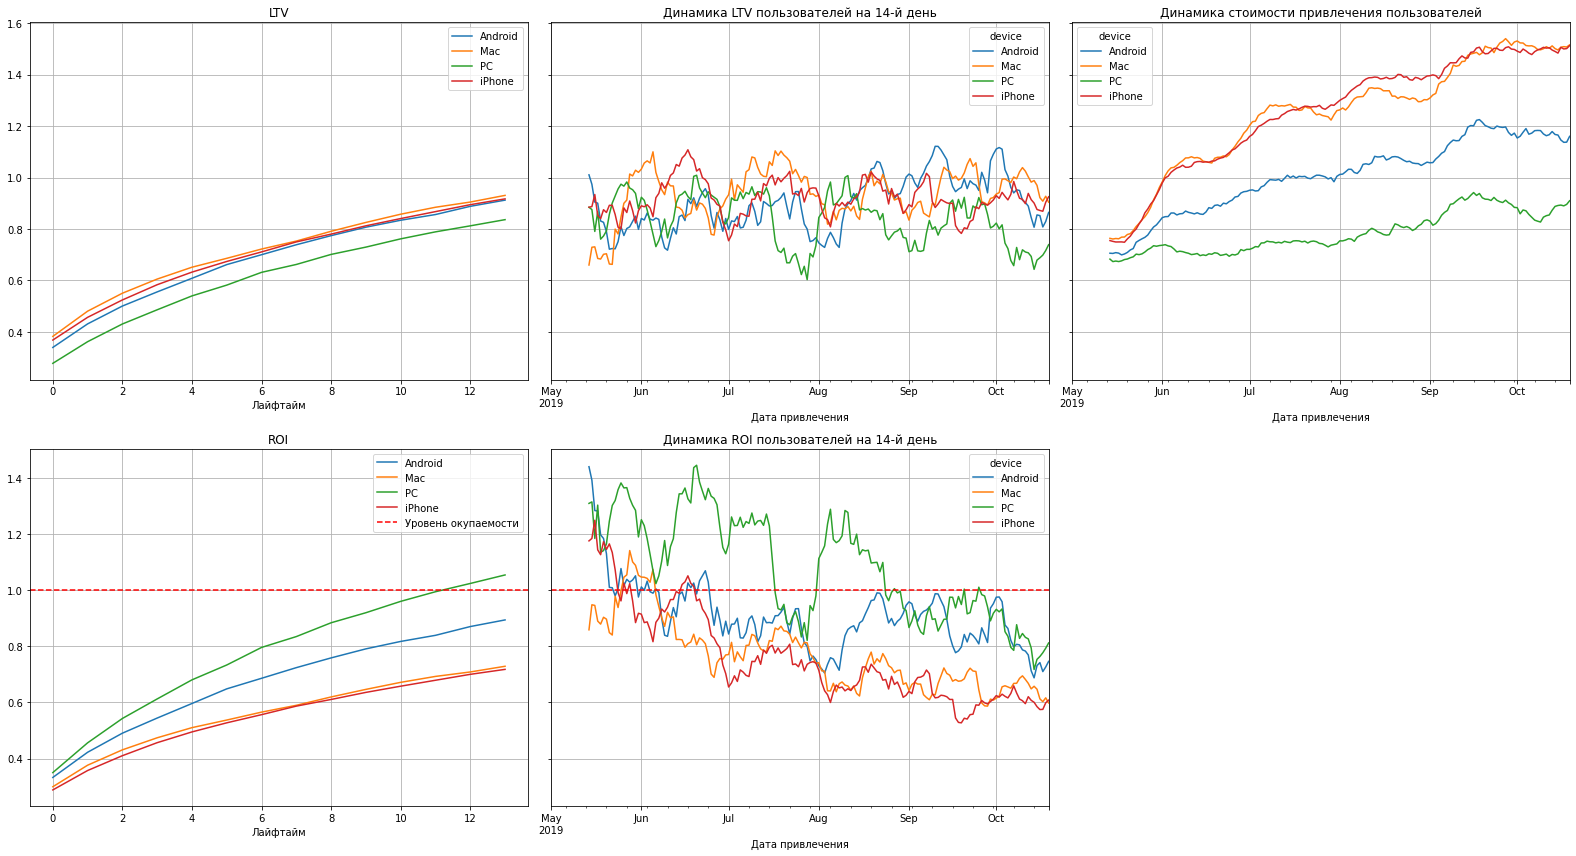

In [47]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**
 1. Реклама окупается только для пользователей, использующих РС. Аутсайдеры - Mac и iPhone. Их ROI на 14 день около 0,75.
 2. В конце мая ROI был выше единицы по всем устройствам, но ,начиная с сентября, ROI меньше 1 у пользователей со всеми видами устройств.
 3. LTV стабилен для всех устройств. 
 4. Самая дорогая стоимость привлечения для пользователей Mac и iPhone. Для всех видов устройств стоимость привлечения постепенно растёт.

### Графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по странам.

**Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по странам.**

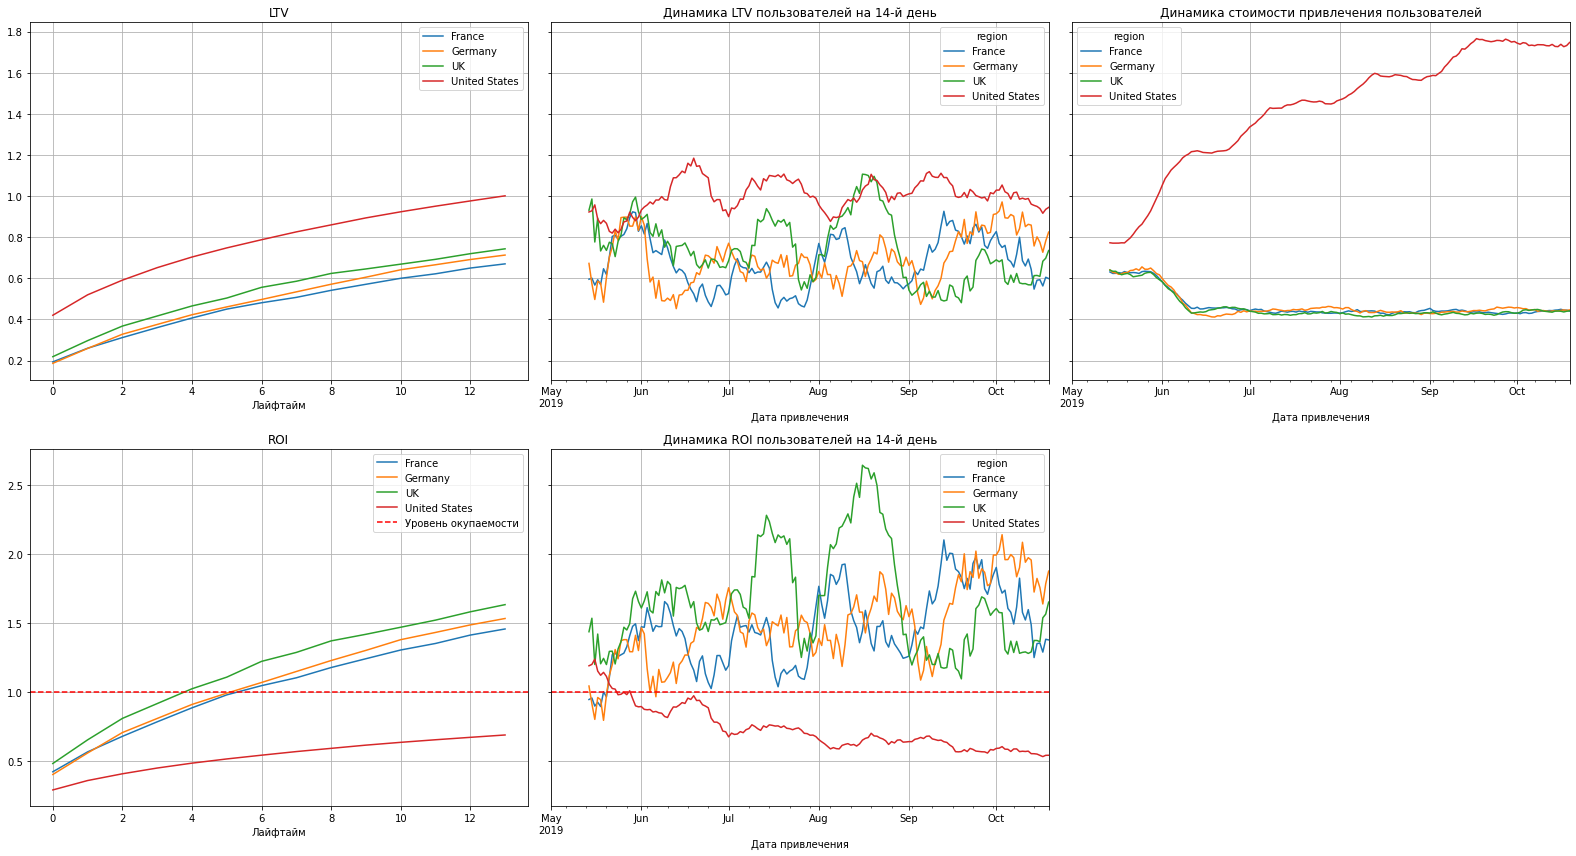

In [48]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**
 1. Реклама не окупается только в США, начиная с июня и по ноябрь. В остальных странах реклама окупается постоянно.
 2. Стоимость привлечения значительно растёт для США на протяжении всего исследуемого периода, а начиная с сентября более, чем в 4 раза превышает стоимость привлечения для других стран. Для остальных стран стоимость привлечения снизилась в полтора раза в начале июня и остаётся стабильно низкой до ноября. 
 3. При этом в США самый высокий LTV - около единицы на 14 день. В европейских странах LTV примерно одинаков - около 0,7.

### Графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по каналам привлечения.

**Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по каналам привлечения.**

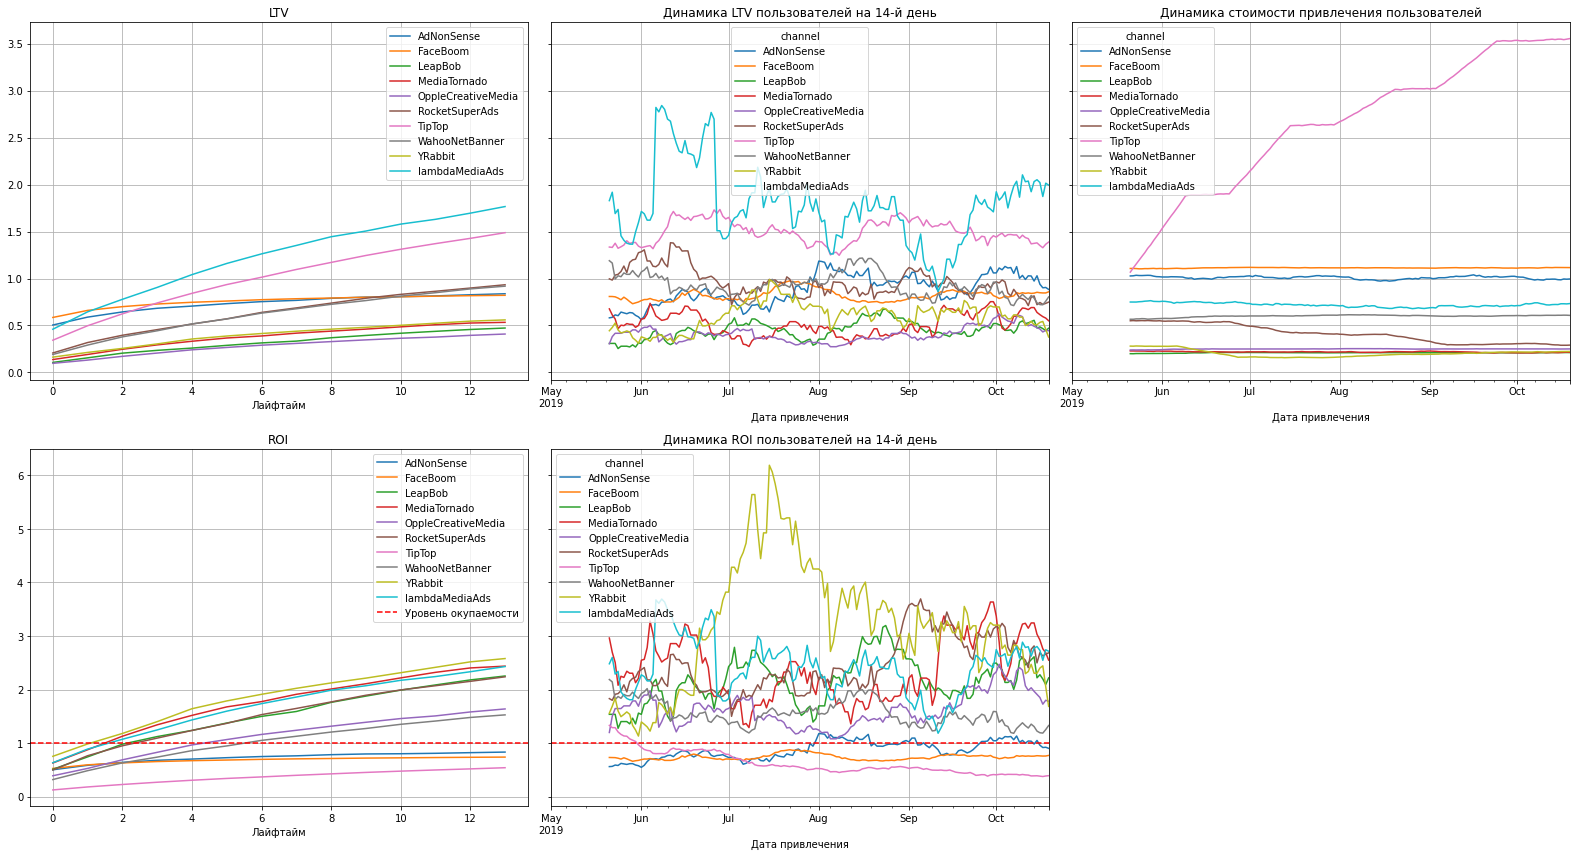

In [49]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=21
)

In [50]:
roi_grouped

cohort_size       cac       0.0       1.0       2.0  \
channel                                                                   
AdNonSense                 3702  1.008023  0.501010  0.584460  0.639288   
FaceBoom                  27544  1.113419  0.526040  0.593510  0.629343   
LeapBob                    8103  0.210000  0.509752  0.741436  0.978967   
MediaTornado               4167  0.219035  0.627684  0.874814  1.127410   
OppleCreativeMedia         8139  0.249908  0.389100  0.526504  0.686996   
RocketSuperAds             4251  0.417431  0.497256  0.763336  0.948932   
TipTop                    18498  2.757774  0.124575  0.180359  0.226321   
WahooNetBanner             8082  0.601856  0.317853  0.484298  0.629588   
YRabbit                    4102  0.217087  0.752238  0.983122  1.179250   
lambdaMediaAds             2056  0.727237  0.632899  0.887333  1.070887   

                         3.0       4.0       5.0       6.0       7.0  \
channel                                                                
AdNonSense          0.678069  0.701069  0.726752  0.748147  0.761519   
FaceBoom            0.654599  0.671035  0.682914  0.695801  0.704818   
LeapBob             1.120908  1.236450  1.374282  1.498034  1.589535   
MediaTornado        1.340729  1.516873  1.675432  1.773841  1.910531   
OppleCreativeMedia  0.826849  0.964769  1.065354  1.161037  1.238564   
RocketSuperAds      1.092347  1.235204  1.367935  1.531090  1.646391   
TipTop              0.268272  0.305449  0.339298  0.367570  0.397585   
WahooNetBanner      0.737309  0.858780  0.946188  1.049868  1.126808   
YRabbit             1.400049  1.641119  1.786814  1.910094  2.022179   
lambdaMediaAds      1.245178  1.432136  1.595673  1.735841  1.859323   

                         8.0       9.0      10.0      11.0      12.0      13.0  
channel                                                                         
AdNonSense          0.782922  0.796294  0.800573  0.808597  0.820631  0.831337  
FaceBoom            0.711685  0.719204  0.724119  0.729488  0.734210  0.737790  
LeapBob             1.759730  1.877030  1.988470  2.085248  2.179087  2.252399  
MediaTornado        2.008962  2.107371  2.216726  2.320602  2.402610  2.436519  
OppleCreativeMedia  1.314661  1.388265  1.457448  1.507006  1.580649  1.637075  
RocketSuperAds      1.767923  1.892809  1.991795  2.070538  2.152657  2.237019  
TipTop              0.424763  0.451627  0.475535  0.497310  0.517679  0.539532  
WahooNetBanner      1.205193  1.271878  1.350049  1.411192  1.477881  1.526304  
YRabbit             2.123045  2.212703  2.313569  2.414457  2.516446  2.578086  
lambdaMediaAds      1.986818  2.070251  2.171709  2.241794  2.331922  2.428712

**Вывод:**
1. Самое высокое качество у клиентов пришедших из каналов TipTop и lambdaMediaAds, их LTV 1,5 и 1,75 соответственно на 14 день жизни. При этом для канала TipTop LTV довольно стабилен, а у lambdaMediaAds LTV бывает хаотичен. У пользователей, пришедших из других каналов LTV ниже 1.
2. Самая дорогая стоимость привлечения у канала TipTop - в среднем 2,75. При этом стоимость резко растёт, начиная с июня, и в октябре достигает 3,5. Также в "Топ-3" по стоимости привлечения входят каналы AdNonSense и FaceBoom - 1 и 1,1 соответственно.	 .
3. Реклама не окупается только по 3 каналам: AdNonSense, FaceBoom и TipTop. По остальным каналам реклама окупается на 14 день в 1,5-2,5 раза.
4. Лидерами по окупаемости являются каналы MediaTornado, YRabbit и lambdaMediaAds. На 14 день их ROI  в районе 2,5. Эти каналы окупаются уже на 3  день жизни пользователей.
5. Судя по динамике ROI, стабильно не окупается канал FaceBoom. TipTop перестал окупаться в июне. А канал AdNonSense хоть и не окупается в целом, показывает положительную динамику и, начиная с августа его ROI колеблется в районе единицы. 

### Узнаём причину убытков компании.

**На предыдущих этапах удалось выяснить, что убыточными являются:**
 - пользователи из США;
 - пользователи привлечённые через 3 рекламных канала: AdNonSense, FaceBoom и TipTop;
 - пользователи, использующие Android, Mac и iPhone. 
  
**Предположим, что проблемы с окупаемостью возникли из-за технической ошибки в мобильном приложении и в приложении для Mac. А в версии для PC всё хорошо. Проверим гипотезу, построив графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по видам устройств отдельно для США и Европы.**

#### Графики LTV и ROI,  графики динамики LTV, CAC и ROI с разбивкой по видам устройств отдельно для США и Европы.

**График для Европы.**

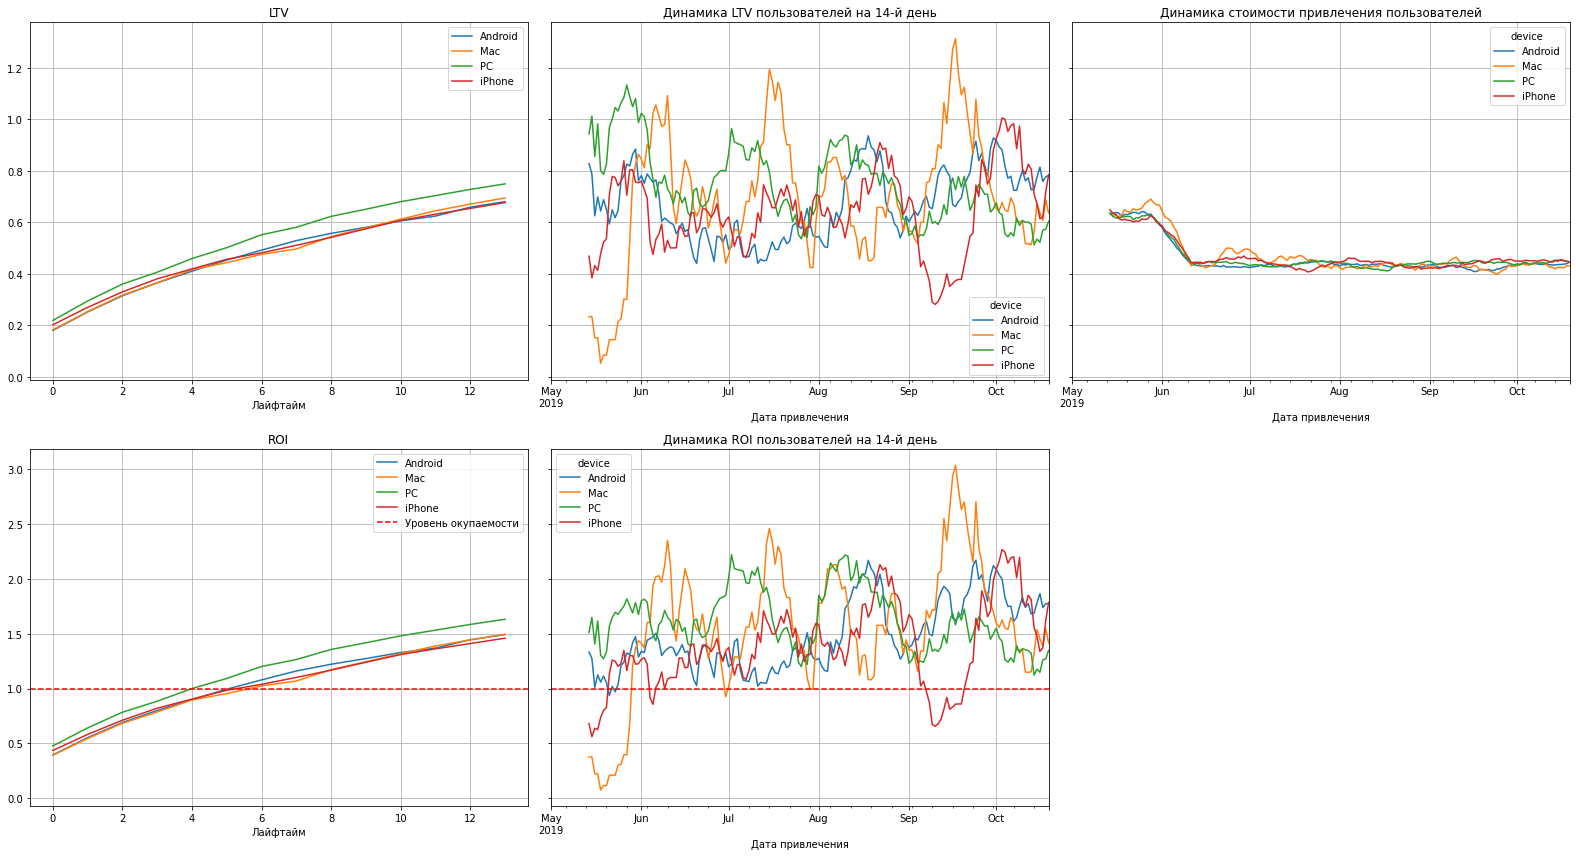

In [51]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic.query('region!="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**График для США.**

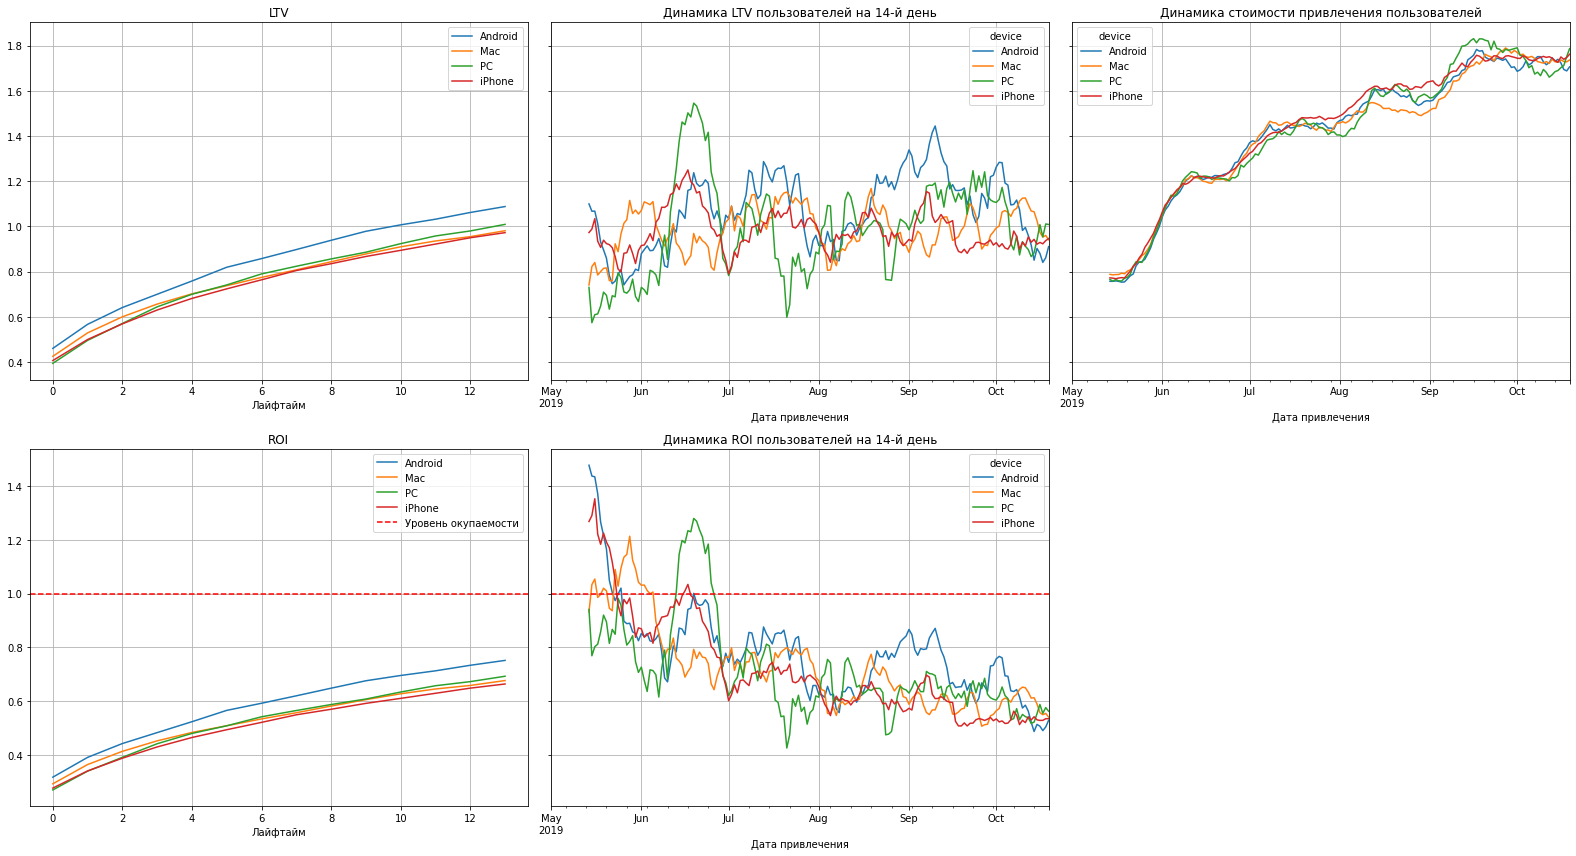

In [52]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic.query('region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод:**
 1. Пользователи, использующие все виды устройств стабильно окупаются в Европе и, наоборот не окупаются в США.
 2. Проблема окупаемости не зависит от вида устройства, которое использует пользователь. Проблема либо в стране пользователей либо в каналах привлечения.

#### Графики LTV и ROI,  графики динамики LTV, CAC и ROI с разбивкой по рекламным каналам отдельно для США и Европы.

**Выясним, как каналы привлечения распределены по странам. Для этого построим сводную таблицу с количеством пользователей по каждой стране по каждому рекламному каналу.**

In [53]:
num_col=['France','Germany','UK','United States']
pr = profiles_without_organic.pivot_table(index='channel',columns='region',values='user_id',aggfunc='nunique').fillna(0) 
pr

region              France  Germany      UK  United States
channel                                                   
AdNonSense          1366.0   1219.0  1295.0            0.0
FaceBoom               0.0      0.0     0.0        29144.0
LeapBob             2988.0   2519.0  3046.0            0.0
MediaTornado           0.0      0.0     0.0         4364.0
OppleCreativeMedia  2991.0   2562.0  3052.0            0.0
RocketSuperAds         0.0      0.0     0.0         4448.0
TipTop                 0.0      0.0     0.0        19561.0
WahooNetBanner      2971.0   2579.0  3003.0            0.0
YRabbit                0.0      0.0     0.0         4312.0
lambdaMediaAds       742.0    649.0   758.0            0.0

**Вывод:** каналы привлечения не пересекаются в США и Европе.


**Проверим какие каналы не окупаются в Европе,а какие в США . Построим графики с разбивкой по каналам отдельно по Европе и отдельно по США.**

**График для США.**

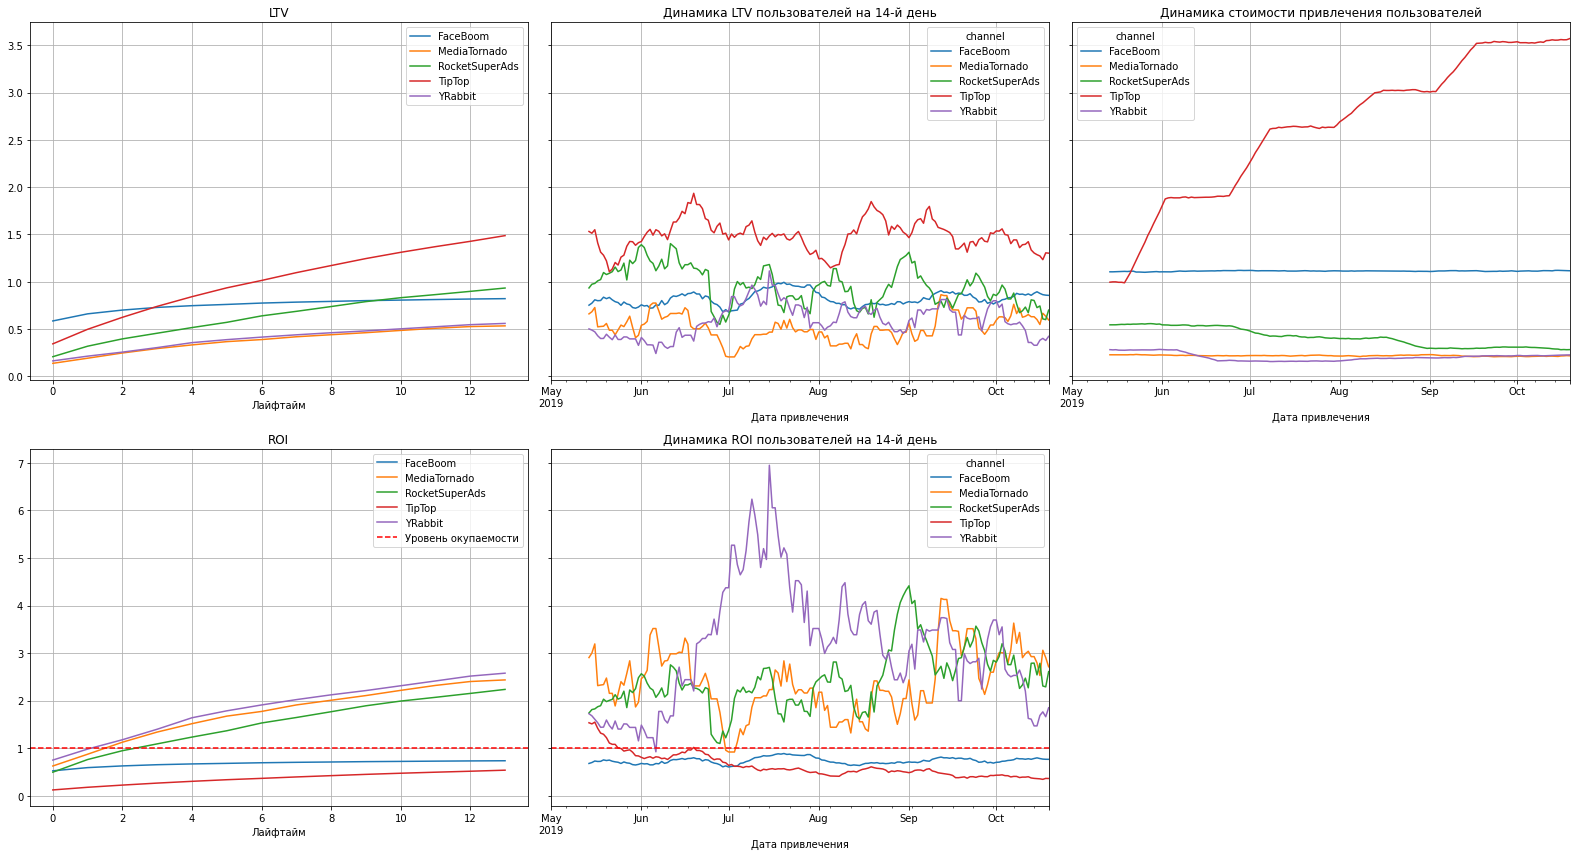

In [54]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic.query('region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

In [55]:
ltv_grouped

cohort_size       0.0       1.0       2.0       3.0       4.0  \
channel                                                                         
FaceBoom              27544  0.585703  0.660825  0.700722  0.728842  0.747143   
MediaTornado           4167  0.137485  0.191615  0.246943  0.293667  0.332249   
RocketSuperAds         4251  0.207570  0.318640  0.396114  0.455980  0.515613   
TipTop                18498  0.343550  0.497389  0.624141  0.739834  0.842358   
YRabbit                4102  0.163301  0.213423  0.256000  0.303932  0.356265   

                     5.0       6.0       7.0       8.0       9.0      10.0  \
channel                                                                      
FaceBoom        0.760369  0.774718  0.784757  0.792404  0.800775  0.806247   
MediaTornado    0.366979  0.388534  0.418474  0.440034  0.461589  0.485541   
RocketSuperAds  0.571019  0.639125  0.687255  0.737986  0.790118  0.831437   
TipTop          0.935707  1.013676  1.096450  1.171400  1.245485  1.311417   
YRabbit         0.387894  0.414656  0.438988  0.460885  0.480349  0.502245   

                    11.0      12.0      13.0  
channel                                       
FaceBoom        0.812226  0.817483  0.821469  
MediaTornado    0.508294  0.526256  0.533684  
RocketSuperAds  0.864307  0.898586  0.933801  
TipTop          1.371467  1.427640  1.487908  
YRabbit         0.524147  0.546287  0.559668

In [56]:
roi_grouped

cohort_size       cac       0.0       1.0       2.0       3.0  \
channel                                                                         
FaceBoom              27544  1.113419  0.526040  0.593510  0.629343  0.654599   
MediaTornado           4167  0.219035  0.627684  0.874814  1.127410  1.340729   
RocketSuperAds         4251  0.417431  0.497256  0.763336  0.948932  1.092347   
TipTop                18498  2.757774  0.124575  0.180359  0.226321  0.268272   
YRabbit                4102  0.217087  0.752238  0.983122  1.179250  1.400049   

                     4.0       5.0       6.0       7.0       8.0       9.0  \
channel                                                                      
FaceBoom        0.671035  0.682914  0.695801  0.704818  0.711685  0.719204   
MediaTornado    1.516873  1.675432  1.773841  1.910531  2.008962  2.107371   
RocketSuperAds  1.235204  1.367935  1.531090  1.646391  1.767923  1.892809   
TipTop          0.305449  0.339298  0.367570  0.397585  0.424763  0.451627   
YRabbit         1.641119  1.786814  1.910094  2.022179  2.123045  2.212703   

                    10.0      11.0      12.0      13.0  
channel                                                 
FaceBoom        0.724119  0.729488  0.734210  0.737790  
MediaTornado    2.216726  2.320602  2.402610  2.436519  
RocketSuperAds  1.991795  2.070538  2.152657  2.237019  
TipTop          0.475535  0.497310  0.517679  0.539532  
YRabbit         2.313569  2.414457  2.516446  2.578086

**График для Европы.**

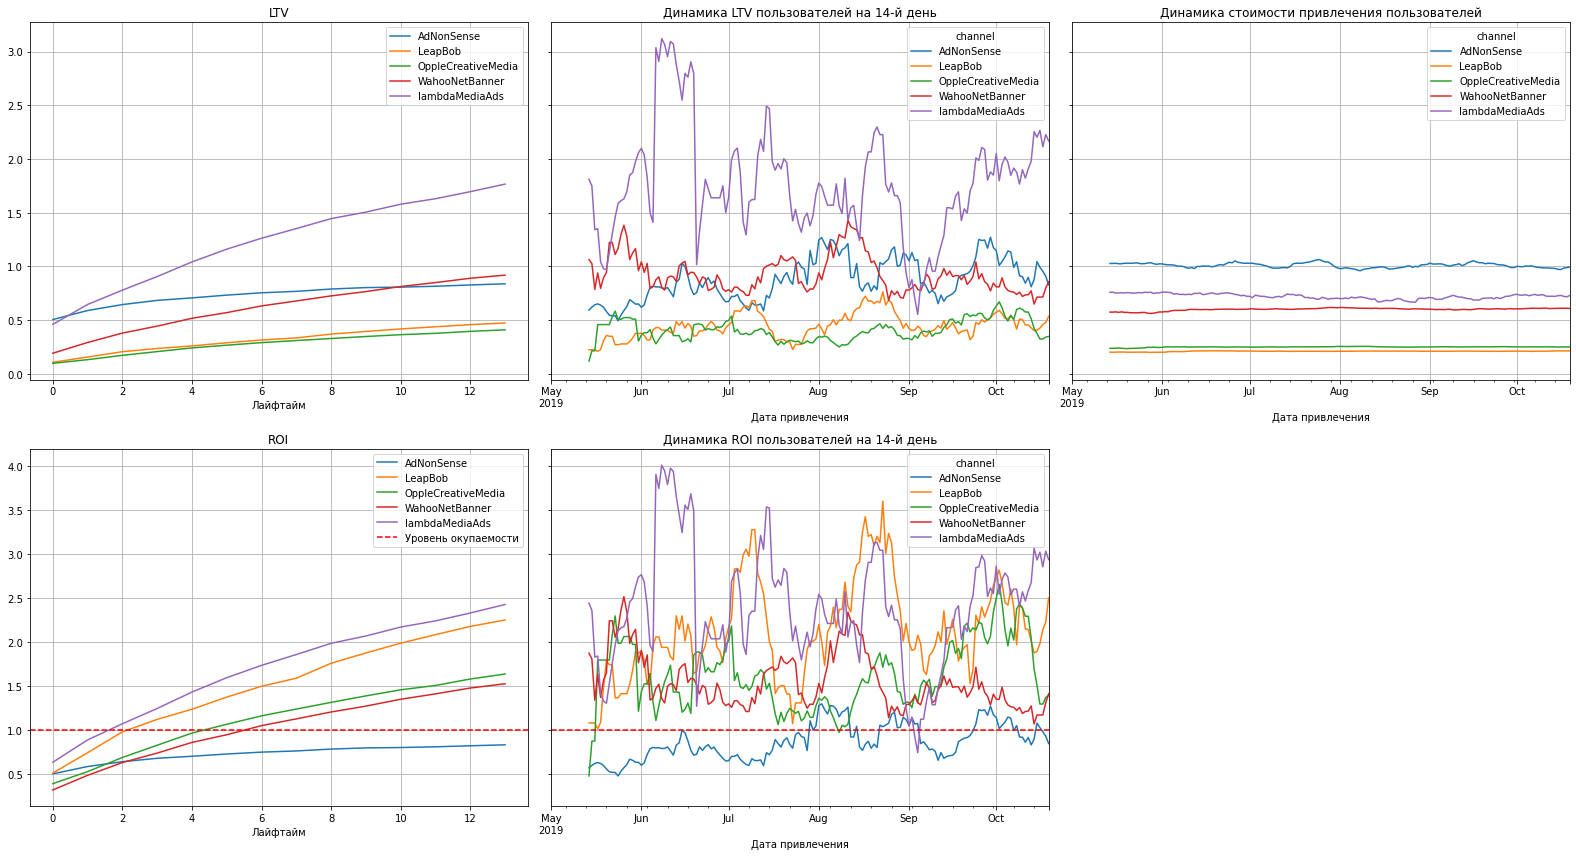

In [57]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic.query('region!="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

In [58]:
ltv_grouped

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
AdNonSense                 3702  0.505030  0.589149  0.644417  0.683509   
LeapBob                    8103  0.107048  0.155702  0.205583  0.235391   
OppleCreativeMedia         8139  0.097239  0.131578  0.171686  0.206636   
WahooNetBanner             8082  0.191302  0.291477  0.378921  0.443754   
lambdaMediaAds             2056  0.460268  0.645302  0.778789  0.905540   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
AdNonSense          0.706694  0.732582  0.754149  0.767628  0.789203   
LeapBob             0.259654  0.288599  0.314587  0.333802  0.369543   
OppleCreativeMedia  0.241103  0.266240  0.290152  0.309527  0.328544   
WahooNetBanner      0.516862  0.569469  0.631870  0.678176  0.725353   
lambdaMediaAds      1.041503  1.160433  1.262369  1.352169  1.444888   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
AdNonSense          0.802682  0.806996  0.815084  0.827215  0.838006  
LeapBob             0.394176  0.417579  0.437902  0.457608  0.473004  
OppleCreativeMedia  0.346938  0.364228  0.376613  0.395017  0.409118  
WahooNetBanner      0.765488  0.812535  0.849334  0.889472  0.918615  
lambdaMediaAds      1.505564  1.579348  1.630316  1.695861  1.766250

**Вывод:**
1. Окупаемость рекламы не зависит от страны пользователя. В США 3 канала стабильно окупаются, а в Европе есть рекламный канал, который не окупается.
2. Компания терпит убытки из-за трёх каналов привлечения: AdNonSense,FaceBoom и TipTop.

#### Графики конверсии и удержания с разбивкой по каналу привлечения.

**Причина убыточности TipTop ясна - стоимость привлечения у этого канала резко растёт, начиная с июня, а LTV остаётся на прежнем уровне. А вот почему не окупается AdNonSense и FaceBoom попробуем выяснить, проверив конверсию и удержание с разбивкой по каналам привлечения.**

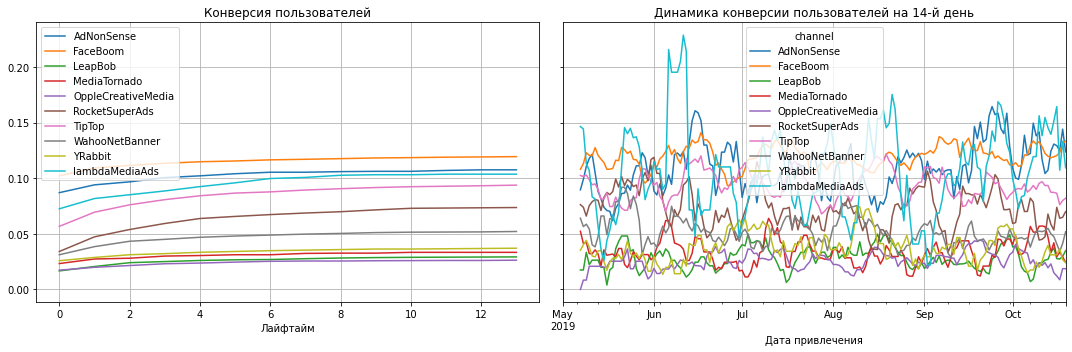

In [59]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

In [60]:
conversion_grouped

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
AdNonSense                 3702  0.086980  0.094003  0.096704  0.100486   
FaceBoom                  27544  0.102091  0.109134  0.111494  0.113346   
LeapBob                    8103  0.016660  0.020610  0.024065  0.025052   
MediaTornado               4167  0.023278  0.027358  0.028078  0.029998   
OppleCreativeMedia         8139  0.017324  0.019904  0.021501  0.023099   
RocketSuperAds             4251  0.034110  0.047283  0.053870  0.059280   
TipTop                    18498  0.056709  0.069413  0.076062  0.080711   
WahooNetBanner             8082  0.031180  0.038481  0.043306  0.045038   
YRabbit                    4102  0.025841  0.028766  0.031204  0.032179   
lambdaMediaAds             2056  0.072471  0.081712  0.085117  0.088521   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
AdNonSense          0.102107  0.103998  0.105348  0.105348  0.105889   
FaceBoom            0.114762  0.115452  0.116468  0.116976  0.117557   
LeapBob             0.026040  0.026657  0.026904  0.027644  0.028261   
MediaTornado        0.030478  0.031198  0.031198  0.032397  0.032637   
OppleCreativeMedia  0.023713  0.024573  0.025310  0.025556  0.025556   
RocketSuperAds      0.063750  0.065632  0.067278  0.068690  0.069866   
TipTop              0.084171  0.086604  0.087685  0.089361  0.090550   
WahooNetBanner      0.046894  0.048008  0.048874  0.049740  0.050359   
YRabbit             0.033398  0.034130  0.034861  0.035349  0.035836   
lambdaMediaAds      0.092412  0.095817  0.099708  0.100681  0.102626   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
AdNonSense          0.106159  0.106159  0.106969  0.107509  0.107509  
FaceBoom            0.118175  0.118465  0.118864  0.119082  0.119373  
LeapBob             0.028631  0.028878  0.029002  0.029125  0.029248  
MediaTornado        0.032637  0.033357  0.033357  0.033357  0.033357  
OppleCreativeMedia  0.025802  0.025925  0.026047  0.026047  0.026293  
RocketSuperAds      0.071513  0.072924  0.073159  0.073394  0.073630  
TipTop              0.091577  0.092334  0.092767  0.093199  0.093740  
WahooNetBanner      0.051101  0.051472  0.051596  0.051720  0.052091  
YRabbit             0.036324  0.036324  0.036568  0.036811  0.037055  
lambdaMediaAds      0.103113  0.103113  0.103599  0.103599  0.103599

**Вывод:** пользователи, привлечённые каналами FaceBoom и AdNonSense конветрируются лучше всех. Более 10% пользователей, привлечённых этими каналами становятся покупателями.

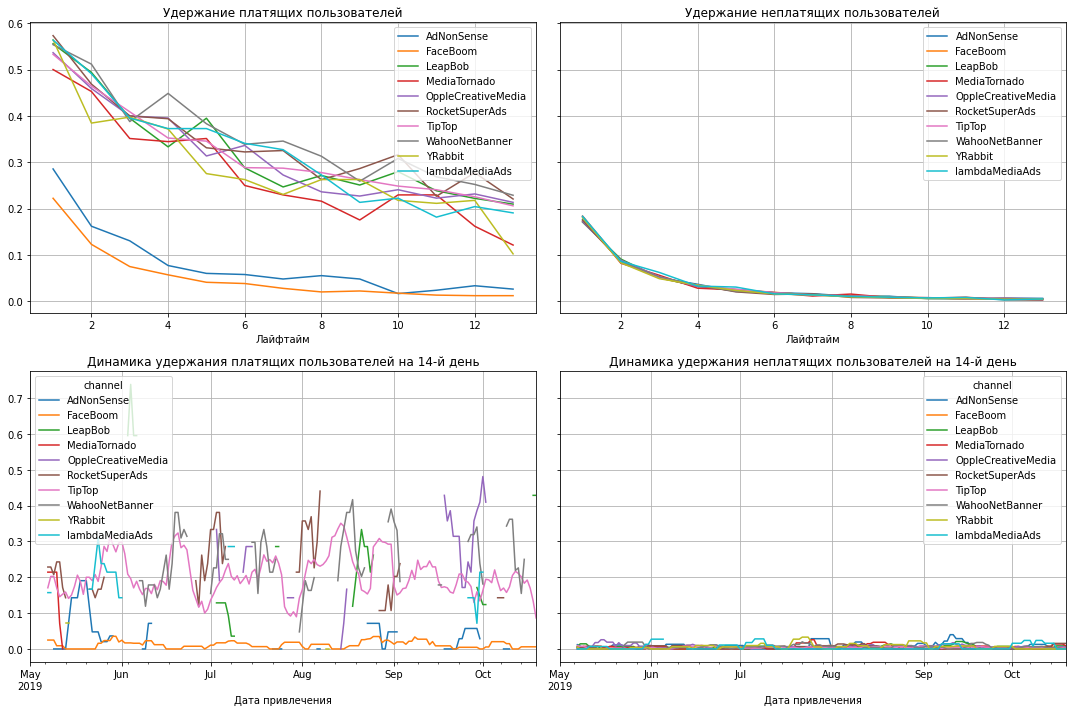

In [61]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

In [62]:
retention_grouped

cohort_size    0         1         2         3  \
payer channel                                                              
False AdNonSense                 3289  1.0  0.176345  0.087565  0.051079   
      FaceBoom                  24182  1.0  0.172980  0.087214  0.050782   
      LeapBob                    7860  1.0  0.171120  0.091349  0.051272   
      MediaTornado               4019  1.0  0.183130  0.082359  0.056482   
      OppleCreativeMedia         7919  1.0  0.171991  0.089026  0.053416   
      RocketSuperAds             3916  1.0  0.175179  0.085802  0.051328   
      TipTop                    16713  1.0  0.181715  0.084605  0.050859   
      WahooNetBanner             7654  1.0  0.184217  0.085446  0.053044   
      YRabbit                    3946  1.0  0.180182  0.083376  0.049164   
      lambdaMediaAds             1836  1.0  0.183007  0.086601  0.062636   
True  AdNonSense                  413  1.0  0.285714  0.162228  0.130751   
      FaceBoom                   3362  1.0  0.222487  0.123141  0.075253   
      LeapBob                     243  1.0  0.555556  0.493827  0.395062   
      MediaTornado                148  1.0  0.500000  0.452703  0.351351   
      OppleCreativeMedia          220  1.0  0.536364  0.459091  0.400000   
      RocketSuperAds              335  1.0  0.573134  0.468657  0.400000   
      TipTop                     1785  1.0  0.532773  0.464426  0.408964   
      WahooNetBanner              428  1.0  0.553738  0.511682  0.387850   
      YRabbit                     156  1.0  0.564103  0.384615  0.397436   
      lambdaMediaAds              220  1.0  0.563636  0.490909  0.395455   

                                 4         5         6         7         8  \
payer channel                                                                
False AdNonSense          0.037093  0.021587  0.018851  0.016722  0.011250   
      FaceBoom            0.032710  0.025267  0.019767  0.013605  0.011910   
      LeapBob             0.032443  0.023155  0.018830  0.014504  0.010941   
      MediaTornado        0.028614  0.024882  0.018661  0.011694  0.015924   
      OppleCreativeMedia  0.032201  0.026266  0.019194  0.014522  0.011870   
      RocketSuperAds      0.035495  0.020684  0.015066  0.016343  0.008682   
      TipTop              0.034943  0.026028  0.018848  0.013941  0.012086   
      WahooNetBanner      0.034492  0.022211  0.017507  0.015025  0.011759   
      YRabbit             0.035226  0.023822  0.016219  0.014192  0.009883   
      lambdaMediaAds      0.033224  0.031046  0.016340  0.014161  0.010893   
True  AdNonSense          0.077482  0.060533  0.058111  0.048426  0.055690   
      FaceBoom            0.057406  0.041344  0.038667  0.028257  0.020523   
      LeapBob             0.333333  0.395062  0.288066  0.246914  0.271605   
      MediaTornado        0.344595  0.351351  0.250000  0.229730  0.216216   
      OppleCreativeMedia  0.395455  0.313636  0.336364  0.272727  0.236364   
      RocketSuperAds      0.394030  0.331343  0.322388  0.325373  0.262687   
      TipTop              0.352381  0.345658  0.288515  0.287395  0.277871   
      WahooNetBanner      0.448598  0.383178  0.338785  0.345794  0.313084   
      YRabbit             0.371795  0.275641  0.262821  0.230769  0.262821   
      lambdaMediaAds      0.372727  0.372727  0.340909  0.327273  0.272727   

                                 9        10        11        12        13  
payer channel                                                               
False AdNonSense          0.011250  0.006081  0.005473  0.006993  0.006689  
      FaceBoom            0.010007  0.008064  0.005500  0.006616  0.004342  
      LeapBob             0.010433  0.007252  0.006616  0.005344  0.004835  
      MediaTornado        0.008460  0.007216  0.008957  0.004479  0.004976  
      OppleCreativeMedia  0.008461  0.008334  0.005556  0.007198  0.005683  
      RocketSuperAds      0.007661  0.007150  0.008427  0.003830  0.002809  
      TipTop        

**Вывод:** удержание платящих пользователей, привлечённых каналами FaceBoom и AdNonSense с первого дня жизни на 30% ниже, чем у других каналов. На 14 день жизни остаются только 1,25%, привлечённых FaceBoom и 2,6% привлечённых AdNonSense.

#### Графики конверсии и удержания с разбивкой по устройству.

**Проверим конверсию и удержание с разбивкой по устройству.**

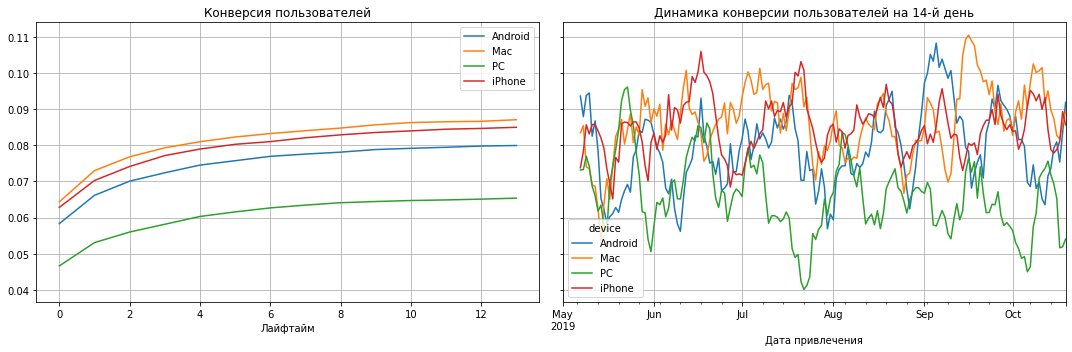

In [63]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

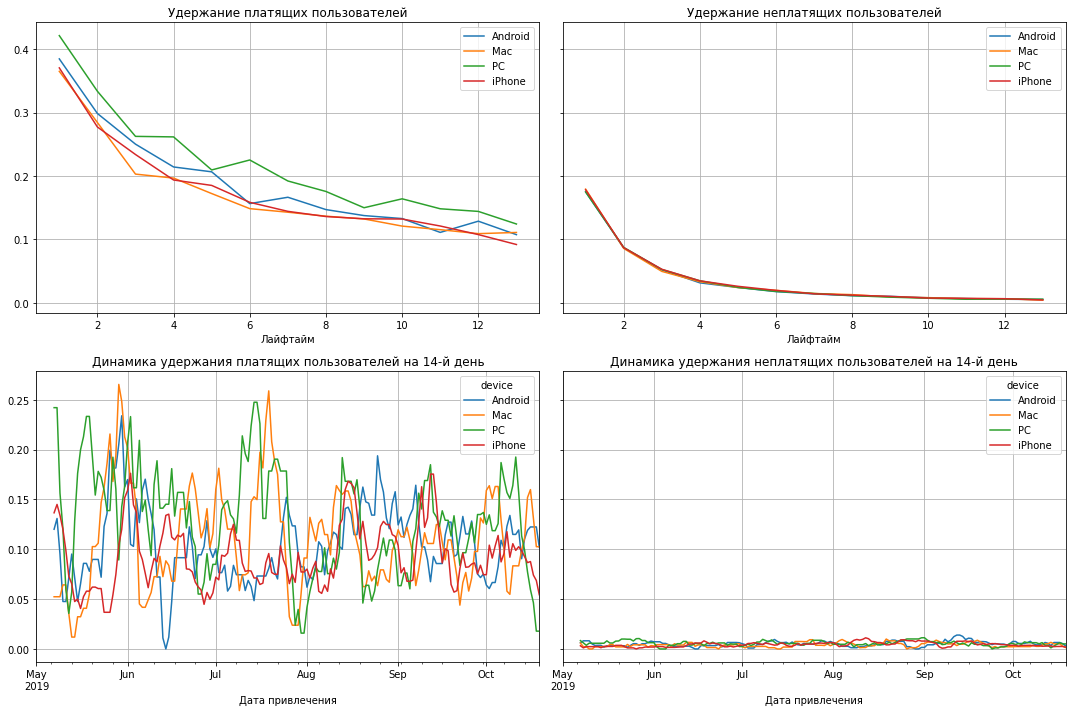

In [64]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:по конверсии явный аутсайдер - пользователи, использующие PC. При этом, по удержанию эти пользователи несущественно опережают остальных.**

#### Графики конверсии и удержания с разбивкой по странам.

**Проверим конверсию и удержание с разбивкой по странам.**

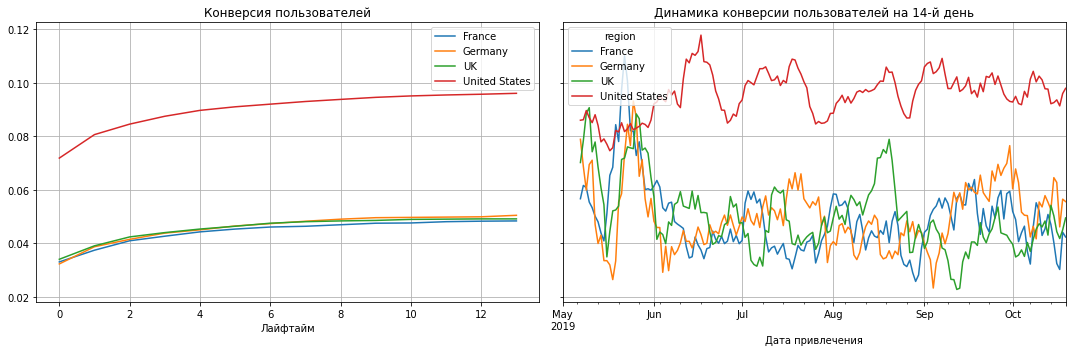

In [65]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

In [66]:
conversion_grouped

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
France               10516  0.033092  0.037467  0.040985  0.042697  0.044313   
Germany               9030  0.032337  0.038760  0.041528  0.043854  0.045072   
UK                   10536  0.034074  0.039104  0.042426  0.044039  0.045368   
United States        58562  0.071873  0.080650  0.084560  0.087497  0.089700   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
France         0.045359  0.046120  0.046405  0.046976  0.047547  0.047642   
Germany        0.046512  0.047398  0.048283  0.049059  0.049612  0.049723   
UK             0.046412  0.047551  0.048121  0.048405  0.048595  0.048975   
United States  0.091032  0.092022  0.093013  0.093798  0.094566  0.095096   

                   11.0      12.0      13.0  
region                                       
France         0.048117  0.048307  0.048402  
Germany        0.049834  0.049945  0.050498  
UK             0.049070  0.049165  0.049165  
United States  0.095454  0.095728  0.096069

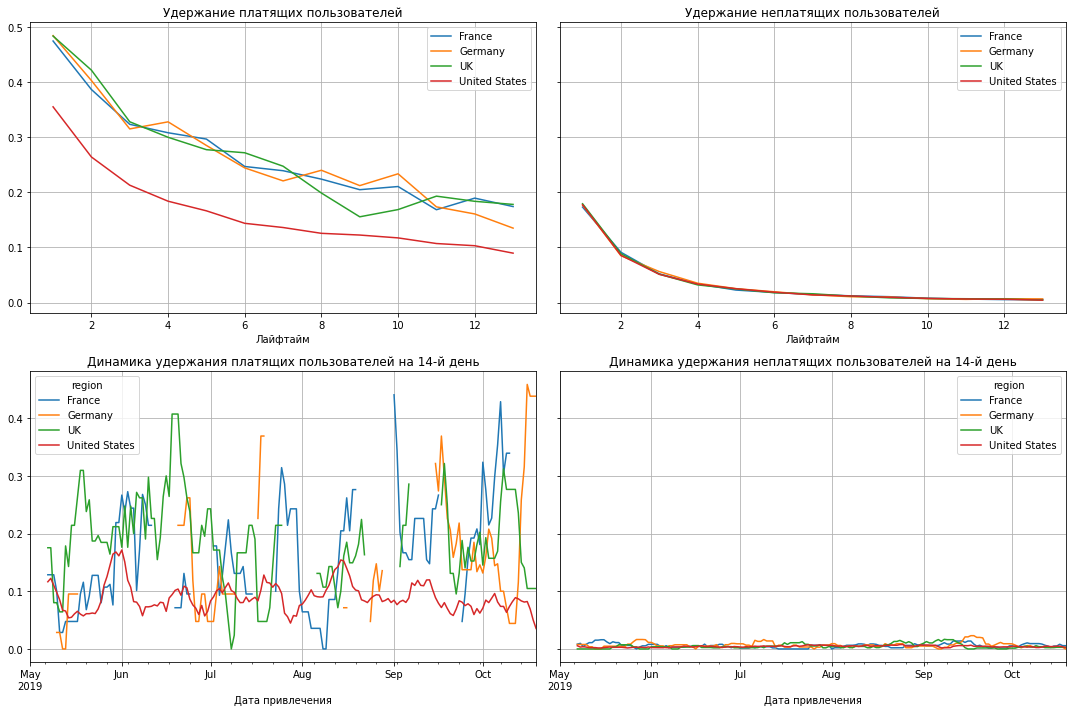

In [67]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод: конверсия пользователей из США примерно в 2 раза выше, чем конверсия остальных пользователей. При этом по удержанию в 2 раза ниже.**

**Посчитаем, сколько повторных покупок делают пользователи по каждому каналу и сколько в среднем приносит платящий пользователь по каждому каналу.**

In [68]:
costs_channel = orders.merge(profiles[['user_id', 'channel']], on='user_id', how='left')#к таблице orders добавляем канал привлечения
costs_channel.head()    

user_id            event_dt  revenue         channel
0  188246423999 2019-05-01 23:09:52     4.99        FaceBoom
1  174361394180 2019-05-01 12:24:04     4.99  RocketSuperAds
2  529610067795 2019-05-01 11:34:04     4.99        FaceBoom
3  319939546352 2019-05-01 15:34:40     4.99        FaceBoom
4  366000285810 2019-05-01 13:59:51     4.99        FaceBoom

In [69]:
#считаем количество и сумму покупок по каналу и id
costs_channel_id=costs_channel.groupby(['channel','user_id']).agg({'revenue':['count',sum]}).reset_index()
costs_channel_id.columns=['channel','user_id','count_revenue','sum_revenue']
#считаем среднее количество покупок для одного пользователя и сумму покупок по каналу и сколько в среднем тратит платящий
costs_channel_channel=costs_channel_id.groupby('channel').agg({'count_revenue':'mean','sum_revenue':['sum','mean']})
costs_channel_channel.columns=['среднее количество повторных покупок','сумма покупок по каналу','средняя сумма покупок платящего']
#вычитаем первую покупку
costs_channel_channel['среднее количество повторных покупок']=costs_channel_channel['среднее количество повторных покупок']-1

costs_channel_channel

среднее количество повторных покупок  \
channel                                                    
AdNonSense                                      0.552273   
FaceBoom                                        0.330897   
LeapBob                                         5.820611   
MediaTornado                                    5.846154   
OppleCreativeMedia                              5.639485   
RocketSuperAds                                  5.159091   
TipTop                                          5.935037   
WahooNetBanner                                  7.249448   
YRabbit                                         6.012121   
lambdaMediaAds                                  6.244444   
organic                                         6.480172   

                    сумма покупок по каналу  средняя сумма покупок платящего  
channel                                                                       
AdNonSense                          3697.17                         8.402659  
FaceBoom                           25637.66                         7.207664  
LeapBob                             9560.13                        36.489046  
MediaTornado                        5752.32                        36.873846  
OppleCreativeMedia                  8365.53                        35.903562  
RocketSuperAds                     11598.32                        32.949773  
TipTop                             69574.76                        37.047263  
WahooNetBanner                     20006.63                        44.164746  
YRabbit                             6201.43                        37.584424  
lambdaMediaAds                      8941.70                        39.740889  
organic                            46627.23                        40.195888

In [70]:
#добавляем количество привлечённых пользователей и долю платящих
costs_channel_channel = costs_channel_channel.merge(channel_profiles ,on='channel',how='left').sort_values(by='среднее количество повторных покупок')

costs_channel_channel.style.format('{:.2f}').highlight_max(color='lightgreen').highlight_min(color='pink')

**Вывод:** пользователи, привлечённые каналами  FaceBoom и  AdNonSense в среднем делают менее одной повторной покупки, тогда как по другим каналам в среднем от пяти повторных покупок . После первой покупки большинство пользователей этих каналов куда-то исчезают.

### Вывод по окупаемости рекламы

1. Реклама в исследуемый период не окупается. В среднем ROI на 14 день составляет около 0,8. Заметно ощутимое падение окупаемости, начиная с середины июня.
2. В среднем конверсия пользователей на 14 день составляет 8%.
3. Удержание платящих пользователей выше, чем неплатящих и составляет около 10% на 14 день жизни.
4. Негативное влияние на окупаемость рекламы оказывают три рекламных канала:AdNonSense, FaceBoom и TipTop. На эти каналы тратится более 85% рекламных расходов.
 - Траты на канал TipToр резко растут, начиная с июня, и в октябре достигает 3,5 на привлечение одного пользователя. При этом LTV этих пользователей остаётся на прежнем уровне- около 1,5.
 - Пользователи, привлечённые каналами FaceBoom и AdNonSense имеют самое низкое удержание. После первой покупки большинство пользователей этих каналов куда-то исчезают. 

## Выводы и рекомендации



### Общие выводы.

**Для исследования мы получили 3 датасета, содержащие следующие данные:**
 - лог сервера с информацией о посещениях сайта;
 - информацию о заказах;
 - информацию о расходах на рекламу.
 
**На стадии предобработки мы:**
 - проверили данные на наличие дубликатов и пропусков;
 - привели столбцы к необходимым типам данных.
 
**В ходе исследования мы:**
 - провели исследвательский анализ данных: определели минимальную и максимальную даты привлечения, исследовали распределение пользователей по признакам (стране, типу устройства и рекламному источнику, из которого пришёл пользователь).
 - провели анализ маркетинга:посчитали общую сумму расхода на рекламу,выяснили как распределяются расходы по рекламным источникам, построили графики динамики изменения расходов во времени по каналам, посчитали среднюю стоимость привлечение одного пользователя (CAC) из каждого источника.
 - оценили окупаемость рекламы, как общую, так и в зависимости от страны, типа устройства и канала привлечения.
 
**Исследование показало:**

 **Распределение пользователей и маркетинг:**
  - Основная часть пользователей - около 66% (100000 человек)приходят из США. Остальные пользователи приходят из Франции, Германии и Великобритании и распределены примерно равномерно.
  - Чаще всего клиенты предпочитают iPhone для пользования приложением.
  - Наибольшее количество пользователей пришли в приложение сами - более 56 тысяч человек. Из рекламных источников лидером по привлечению является FaceBoom - 29144 человека
  - Общая сумма расходов на маркетинг составила 105497. При этом более 80% всех затрат на маркетинг пришлись на 2 канала привлечения: TipTop и FaceBoom.
  - Средняя стоимость привлечения оказалась у канала TipTop - почти 2,8.
 
 **Окупаемость рекламы:**
  - В целом реклама не окупается. Окупаемость стабильно падает, начиная с середины июня.
  - С середины мая наблюдается резкое подорожание привлечённого пользователя.
  - Причинами неэффективности привлечения пользователей является убыточность трёх каналов привлечения:AdNonSense, FaceBoom и TipTop


### Рекомендации для отдела маркетинга

1. Канал AdNonSense - отказаться от рекламы по этому каналу. Маштабировать более успешные каналы, действующие в Европе:
 - WahooNetBanner - лидер по удержанию среди европейских каналов и один из двух лучших каналов Европы по LTV и конверсии;
 - lambdaMediaAds - лидер по LTV и конверсии в Европе.
2. Канал TipTop - вернуться к прежнему способу оплаты рекламы, действующему до мая 2019 года, когда канал окупался.
3. Канал FaceBoom - изменить способ оплаты рекламы на CPA. Оплачивать привлечение только покупающих пользователей.
4. Канал RocketSuperAds - развивать канал, так как он является лидером в США по LTV(не считая TipTop) и удержанию.
5. Организовать ежемесячный мониторинг маркетинговых показателей.